In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

from sklearn.model_selection import train_test_split

#classification(분류)
from sklearn.tree import DecisionTreeClassifier      #의사결정트리
from sklearn.ensemble import RandomForestClassifier  #랜덤포레스트
from sklearn.neighbors import KNeighborsClassifier   #KNN(K_Nearst_Neighbor)K-최근접이웃
from sklearn.linear_model import LogisticRegression  #로지스틱회귀
from sklearn.svm import SVC                          #SVM(Support_Vector_Machine)서포트벡터머신


from sklearn.metrics import confusion_matrix      #혼동행렬
from sklearn.metrics import accuracy_score        #정확도
from sklearn.metrics import precision_score     #정밀도
from sklearn.metrics import recall_score        #재현율
from sklearn.metrics import f1_score            #f1
from sklearn.metrics import roc_auc_score       #roc_auc
from sklearn.metrics import classification_report #종합

In [2]:
path = './data/'
train = pd.read_csv(path + 'train.csv')
test = pd.read_csv(path + 'test.csv')
target = pd.read_csv(path + 'submission_sample.csv')

In [3]:
print("train:", train.shape)  # open:1, close:0
print("test:", test.shape)
print('target:', target.shape)

train: (301, 58)
test: (127, 58)
target: (127, 2)


### <span style="color:red"> train: test =7:3으로 분리 </span>

## 데이터 전처리
- 우선 모든 변수를 넣고 DecisionTree와 RandomForest 분석하여 변수 중요도를 파악할 예정
- DT와 RF모델링을 위한 전처리와 인코딩 작업

In [4]:
df_train = train.loc[:, "OC":]
df_test = test[:]

In [5]:
df_train

,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,salary1,...,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
0,open,choongnam,73,20071228,175.0,nursing_hospital,4.217530e+09,0.000000e+00,3.961135e+09,2.033835e+09,...,7.589937e+08,2.228769e+08,0.000000e+00,5.361169e+08,3.900000e+08,2.619290e+09,1.271224e+09,62.0,64.0,same
1,open,gyeongnam,32,19970401,410.0,general_hospital,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,801.0,813.0,same
2,open,gyeonggi,89,20161228,468.0,nursing_hospital,1.004522e+09,5.154837e+08,4.472197e+08,2.964023e+08,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,234.0,1.0,same
3,open,incheon,141,20000814,353.0,general_hospital,7.250734e+10,0.000000e+00,7.067740e+10,3.178605e+10,...,3.775501e+10,1.701860e+10,9.219427e+09,2.073641e+10,1.510000e+10,1.295427e+10,7.740829e+09,663.0,663.0,same
4,open,gyeongnam,32,20050901,196.0,general_hospital,4.904354e+10,0.000000e+00,4.765605e+10,2.446078e+10,...,5.143259e+10,3.007259e+10,1.759375e+10,2.136001e+10,1.410803e+10,5.561941e+06,9.025550e+09,206.0,197.0,same
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,open,jeonnam,178,20050211,214.0,nursing_hospital,7.614697e+09,4.153475e+08,5.903119e+09,3.467861e+09,...,9.423771e+09,2.618201e+09,0.000000e+00,6.805570e+09,5.930000e+09,5.379502e+09,8.116416e+08,193.0,141.0,same
297,close,choongnam,159,20140618,NaN,hospital,6.717144e+09,8.200000e+09,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,79.0,79.0,same
298,close,gyeongbuk,107,19830705,NaN,hospital,0.000000e+00,0.000000e+00,5.479428e+07,7.500000e+06,...,6.370097e+09,2.170973e+09,0.000000e+00,4.199124e+09,2.498749e+09,3.259161e+09,0.000000e+00,NaN,NaN,NaN
299,close,gyeonggi,169,20070101,180.0,nursing_hospital,2.116892e+09,2.681748e+08,3.286245e+09,2.231944e+09,...,6.392336e+08,6.400000e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,100.0,NaN,NaN


In [6]:
df_test

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,...,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
0,2,NaN,incheon,139,19981125.0,300.0,general_hospital,6.682486e+10,0.000000e+00,6.565709e+10,...,5.540643e+10,5.068443e+10,3.714334e+10,4.720000e+09,4.690000e+09,1.608540e+10,8.944587e+09,693.0,693.0,same
1,5,NaN,jeju,149,20160309.0,44.0,hospital,3.495758e+10,0.000000e+00,3.259270e+10,...,6.730838e+10,4.209828e+10,2.420000e+10,2.521009e+10,1.830000e+10,3.789135e+09,0.000000e+00,379.0,371.0,same
2,6,NaN,jeonnam,103,19890427.0,276.0,general_hospital,2.326031e+10,2.542571e+09,2.308749e+10,...,0.000000e+00,2.777589e+10,2.182278e+10,0.000000e+00,0.000000e+00,0.000000e+00,1.638540e+10,NaN,NaN,NaN
3,8,NaN,busan,71,20100226.0,363.0,general_hospital,0.000000e+00,0.000000e+00,0.000000e+00,...,1.211517e+10,9.556237e+09,4.251867e+09,2.558931e+09,0.000000e+00,3.914284e+10,0.000000e+00,760.0,760.0,same
4,10,NaN,jeonbuk,26,20040604.0,213.0,general_hospital,5.037025e+10,0.000000e+00,4.855803e+10,...,4.395973e+10,7.535567e+09,3.298427e+09,3.642417e+10,2.134712e+10,2.574488e+10,1.507269e+10,437.0,385.0,same
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,424,NaN,jeonnam,33,20011012.0,0.0,traditional_clinic,2.233031e+10,8.484657e+08,1.849255e+10,...,1.563217e+10,1.288180e+10,0.000000e+00,2.750371e+09,0.000000e+00,1.384958e+10,0.000000e+00,560.0,NaN,NaN
123,425,NaN,gyeonggi,74,20010530.0,NaN,traditional_hospital,1.833906e+10,0.000000e+00,1.760117e+10,...,3.176628e+09,1.376742e+09,0.000000e+00,1.799886e+09,1.740000e+09,8.574502e+09,7.136681e+09,132.0,137.0,same
124,429,NaN,gyeonggi,116,20010101.0,150.0,hospital,1.424266e+10,1.726174e+09,1.148722e+10,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN
125,430,NaN,jeju,76,20010201.0,NaN,NaN,4.892710e+10,4.157148e+10,4.721485e+09,...,3.720397e+10,8.485918e+09,0.000000e+00,2.871805e+10,2.563120e+10,-2.050629e+08,0.000000e+00,363.0,343.0,same


In [7]:
df_test['OC'] = pd.merge(df_test, target, on = 'inst_id')['OC_y']
df_test

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,...,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
0,2,0,incheon,139,19981125.0,300.0,general_hospital,6.682486e+10,0.000000e+00,6.565709e+10,...,5.540643e+10,5.068443e+10,3.714334e+10,4.720000e+09,4.690000e+09,1.608540e+10,8.944587e+09,693.0,693.0,same
1,5,0,jeju,149,20160309.0,44.0,hospital,3.495758e+10,0.000000e+00,3.259270e+10,...,6.730838e+10,4.209828e+10,2.420000e+10,2.521009e+10,1.830000e+10,3.789135e+09,0.000000e+00,379.0,371.0,same
2,6,0,jeonnam,103,19890427.0,276.0,general_hospital,2.326031e+10,2.542571e+09,2.308749e+10,...,0.000000e+00,2.777589e+10,2.182278e+10,0.000000e+00,0.000000e+00,0.000000e+00,1.638540e+10,NaN,NaN,NaN
3,8,0,busan,71,20100226.0,363.0,general_hospital,0.000000e+00,0.000000e+00,0.000000e+00,...,1.211517e+10,9.556237e+09,4.251867e+09,2.558931e+09,0.000000e+00,3.914284e+10,0.000000e+00,760.0,760.0,same
4,10,0,jeonbuk,26,20040604.0,213.0,general_hospital,5.037025e+10,0.000000e+00,4.855803e+10,...,4.395973e+10,7.535567e+09,3.298427e+09,3.642417e+10,2.134712e+10,2.574488e+10,1.507269e+10,437.0,385.0,same
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,424,0,jeonnam,33,20011012.0,0.0,traditional_clinic,2.233031e+10,8.484657e+08,1.849255e+10,...,1.563217e+10,1.288180e+10,0.000000e+00,2.750371e+09,0.000000e+00,1.384958e+10,0.000000e+00,560.0,NaN,NaN
123,425,0,gyeonggi,74,20010530.0,NaN,traditional_hospital,1.833906e+10,0.000000e+00,1.760117e+10,...,3.176628e+09,1.376742e+09,0.000000e+00,1.799886e+09,1.740000e+09,8.574502e+09,7.136681e+09,132.0,137.0,same
124,429,0,gyeonggi,116,20010101.0,150.0,hospital,1.424266e+10,1.726174e+09,1.148722e+10,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN
125,430,0,jeju,76,20010201.0,NaN,NaN,4.892710e+10,4.157148e+10,4.721485e+09,...,3.720397e+10,8.485918e+09,0.000000e+00,2.871805e+10,2.563120e+10,-2.050629e+08,0.000000e+00,363.0,343.0,same


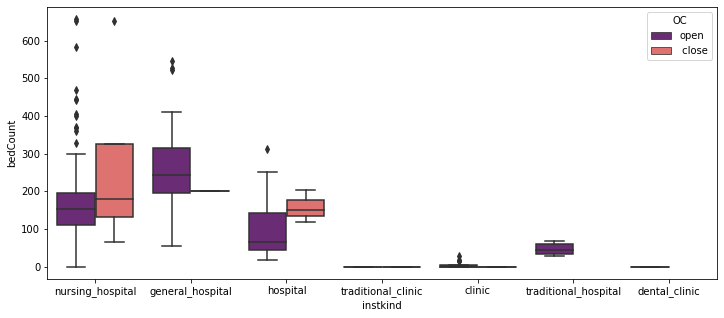

In [8]:
plt.figure(figsize=(12,5))
sns.boxplot('instkind', 'bedCount', hue='OC',data=df_train, palette='magma')
plt.show()

#### 병원 종류 별로 값이가 남
예를 들어 종합병원과 일반 클리닉의 침대 병상 수는 차이가 있음
따라서 결측치는 병원 종류별로 Group By하여 평균을 구해 결측치 대체

### <span style="color:red">결측 대체 </span>
- 병원 종류 평균으로 대체
- 병원 종류가 없는 1개는 행 삭제

In [9]:
df_train.isnull().sum() 

OC                     0
sido                   0
sgg                    0
openDate               0
bedCount               5
instkind               1
revenue1               8
salescost1             8
sga1                   8
salary1                8
noi1                   8
noe1                   8
interest1              8
ctax1                  8
profit1                8
liquidAsset1           8
quickAsset1            8
receivableS1           8
inventoryAsset1        8
nonCAsset1             8
tanAsset1              8
OnonCAsset1            8
receivableL1           8
debt1                  8
liquidLiabilities1     8
shortLoan1             8
NCLiabilities1         8
longLoan1              8
netAsset1              8
surplus1               8
revenue2               8
salescost2             8
sga2                   8
salary2                8
noi2                   8
noe2                   8
interest2              8
ctax2                  8
profit2                8
liquidAsset2           8


In [10]:
df_test.isnull().sum()

inst_id                0
OC                     0
sido                   0
sgg                    0
openDate               1
bedCount               8
instkind               2
revenue1               2
salescost1             2
sga1                   2
salary1                2
noi1                   2
noe1                   2
interest1              2
ctax1                  2
profit1                2
liquidAsset1           2
quickAsset1            2
receivableS1           2
inventoryAsset1        2
nonCAsset1             2
tanAsset1              2
OnonCAsset1            2
receivableL1           2
debt1                  2
liquidLiabilities1     2
shortLoan1             2
NCLiabilities1         2
longLoan1              2
netAsset1              2
surplus1               2
revenue2               2
salescost2             2
sga2                   2
salary2                2
noi2                   2
noe2                   2
interest2              2
ctax2                  2
profit2                2


In [11]:
# ownerChange Null 로 결측값 입력
df_train['ownerChange'].fillna('null', inplace = True)
df_test['ownerChange'].fillna('null', inplace = True)
df_train['ownerChange'].isnull().sum() 

0

데이터 수가 적기 때문에 ownerChange를 null로 데이터를 유지하여 분석함

In [12]:
# 병원 종류가 없는 행 삭제 
df_train = df_train[df_train['instkind'].isnull() == False]

In [13]:
# group by하여 평균 구해서 결측치 대체
fill_mean_func = lambda g: g.fillna(g.mean())
df_train = df_train.groupby('instkind').apply(fill_mean_func)
df_test = df_test.groupby('instkind').apply(fill_mean_func)
df_train.isnull().sum()

OC                    0
sido                  0
sgg                   0
openDate              0
bedCount              0
instkind              0
revenue1              0
salescost1            0
sga1                  0
salary1               0
noi1                  0
noe1                  0
interest1             0
ctax1                 0
profit1               0
liquidAsset1          0
quickAsset1           0
receivableS1          0
inventoryAsset1       0
nonCAsset1            0
tanAsset1             0
OnonCAsset1           0
receivableL1          0
debt1                 0
liquidLiabilities1    0
shortLoan1            0
NCLiabilities1        0
longLoan1             0
netAsset1             0
surplus1              0
revenue2              0
salescost2            0
sga2                  0
salary2               0
noi2                  0
noe2                  0
interest2             0
ctax2                 0
profit2               0
liquidAsset2          0
quickAsset2           0
receivableS2    

In [14]:
df_test[df_test['instkind']=='traditional_hospital']

,,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,...,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
instkind,,,,,,,,,,,,,,,,,,,,,,
traditional_hospital,123,425,0,gyeonggi,74,20010530.0,NaN,traditional_hospital,1.833906e+10,0.0,1.760117e+10,...,3.176628e+09,1.376742e+09,0.0,1.799886e+09,1.740000e+09,8.574502e+09,7.136681e+09,132.0,137.0,same


In [15]:
df_test['bedCount'].fillna(0, inplace=True)

Trainditional_hosipital 병원의 평균이 없어서 0으로 대체

## LabelEncoder

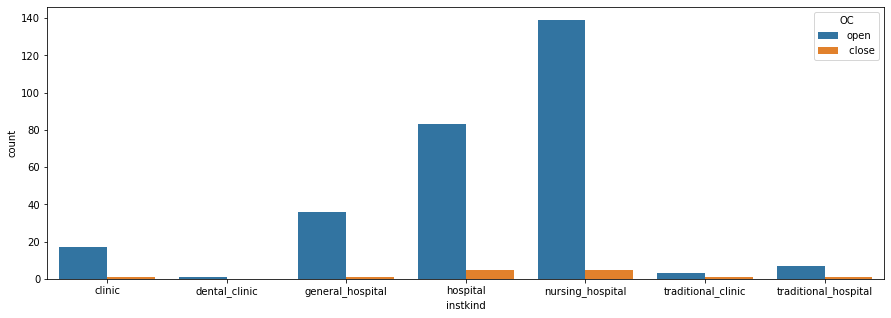

In [16]:
plt.figure(figsize=(15,5))
sns.countplot(x = 'instkind', hue = 'OC', data = df_train)
plt.show()

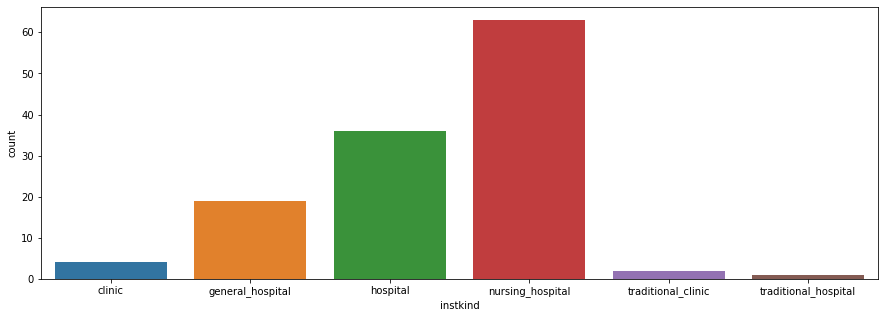

In [17]:
plt.figure(figsize=(15,5))
sns.countplot(x = 'instkind', data = df_test)

In [18]:
df_train['instkind'].value_counts()

nursing_hospital        144
hospital                 88
general_hospital         37
clinic                   18
traditional_hospital      8
traditional_clinic        4
dental_clinic             1
Name: instkind, dtype: int64

In [19]:
df_train['openDate'] =  df_train['openDate'].apply(lambda x: str(x)[:4])
df_train['OC'].replace({'open':0, ' close':1}, inplace =True) #target(submission.csv 기준으로 인코딩으로)
df_train['sgg'] = df_train['sgg'].astype(object)

df_test['openDate'] =  df_test['openDate'].apply(lambda x: str(x)[:4])
df_test['sgg'] = df_test['sgg'].astype(object)

In [20]:
objects =['sido','instkind', 'ownerChange']

le = LabelEncoder()
for column in objects:
    le.fit(df_train[column])
    df_train[column] = le.transform(df_train[column])

    
for column in objects:
    le.fit(df_test[column])
    df_test[column] = le.transform(df_test[column])


In [21]:
objects =['inst_id','OC','sido','sgg','openDate','instkind','ownerChange']
df_train.head()

OC  sido  sgg openDate  bedCount  instkind      revenue1  \
instkind                                                                 
clinic   39    0     8  120     2005       0.0         0  1.510000e+11   
         68    0     8   80     2012       0.0         0  2.600028e+09   
         110   0     8   18     2012       0.0         0  2.097084e+10   
         120   0     4   47     1984       0.0         0  1.889868e+09   
         138   0     7  132     2009      29.0         0  2.544681e+09   

                salescost1          sga1       salary1  ...         debt2  \
instkind                                                ...                 
clinic   39   9.850332e+10  4.954776e+10  3.726935e+09  ...  3.019425e+10   
         68   2.147255e+08  2.483782e+09  1.095681e+09  ...  4.232660e+09   
         110  1.146890e+10  8.325001e+09  4.065724e+09  ...  9.744442e+09   
         120  1.128316e+08  1.694670e+09  1.077318e+09  ...  1.627828e+09   
         138  1.854037e+08  2.162553e+09  1.386497e+09  ...  1.819302e+09   

              liquidLiabilities2    shortLoan2  NCLiabilities2     longLoan2  \
instkind                                                                       
clinic   39         2.151760e+10  0.000000e+00    8.676656e+09  0.000000e+00   
         68         3.818990e+09  2.730000e+09    4.136694e+08  0.000000e+00   
         110        5.257777e+09  1.345786e+09    4.486666e+09  2.230000e+09   
         120        1.627828e+09  1.078103e+09    0.000000e+00  0.000000e+00   
         138        8.193017e+08  6.300000e+08    1.000000e+09  1.000000e+09   

                 netAsset2     surplus2  employee1  employee2  ownerChange  
instkind                                                                    
clinic   39   2.846885e+10   43194221.0      454.0      425.0            2  
         68   1.868636e+09  259263363.0       40.0       40.0            2  
         110  1.790415e+09          0.0      152.0      127.0            2  
         120  8.421260e+08          0.0       35.0       32.0            2  
         138  1.156666e+09   35135410.0       20.0       19.0            2  

[5 rows x 57 columns]

###  오픈년도 cutting 하기
* 특정 연도에 오픈을 했다는 것이 분류에 의미가 없을 것 같음
* 그래서 90년이하, 2000년대, 2010년 이상으로 연도 cutting 함

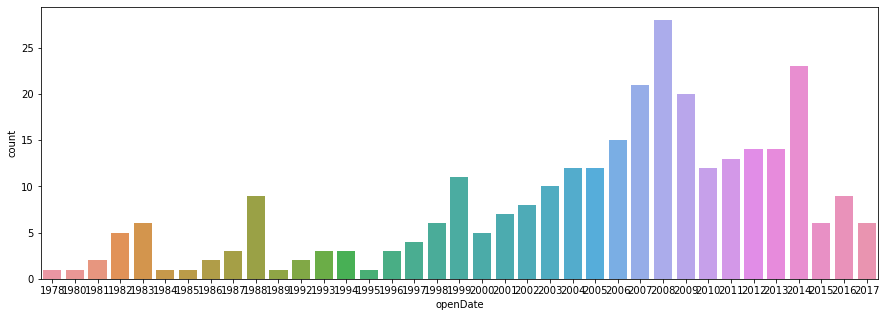

In [22]:
# 오픈년도 cutting으로 구간 주기
df_train['openDate'] =  df_train['openDate'].apply(lambda x: str(x)[:4])
plt.figure(figsize=(15,5))
sns.countplot('openDate', data = df_train)

In [23]:
print('Min:', min(df_train['openDate']))
print('Max:', max(df_train['openDate']))

Min: 1978
Max: 2017


In [24]:
df_train['openDate'] =df_train['openDate'].astype(float)
df_train['open_cut'] = pd.cut(df_train.openDate, bins = [1976, 1999,2009,2017], labels= ['90','00','10']) # 90년대 이전, 00년대, 10년대 이후

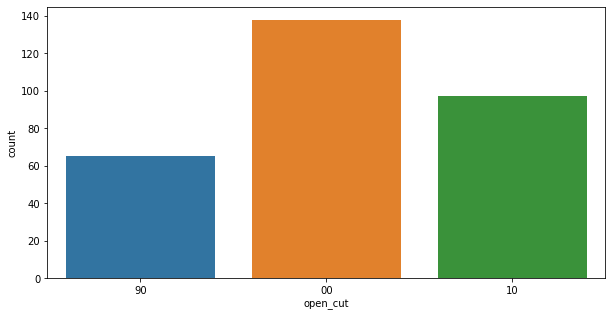

In [25]:
plt.figure(figsize=(10,5))
sns.countplot('open_cut', data = df_train)

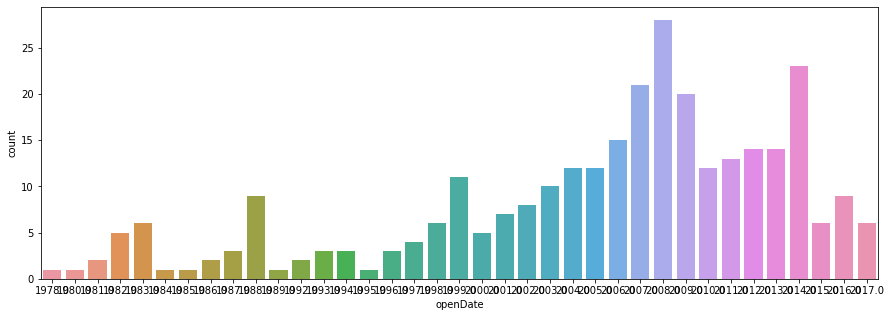

In [26]:
# 년도 cutting으로 구간 주기
df_test['openDate'] =  df_test['openDate'].apply(lambda x: str(x)[:4])
plt.figure(figsize=(15,5))
sns.countplot('openDate', data = df_train)

In [27]:
print('Min:', min(df_test['openDate']))
print('Max:', max(df_test['openDate']))

Min: 1976
Max: 2017


In [28]:
df_test['openDate'] =df_test['openDate'].astype(float)
df_test['open_cut'] = pd.cut(df_test.openDate, bins = [1975,1999,2009,2018], labels= ['90','00','10']) # 90년대 이전, 00년대, 10년대 이후

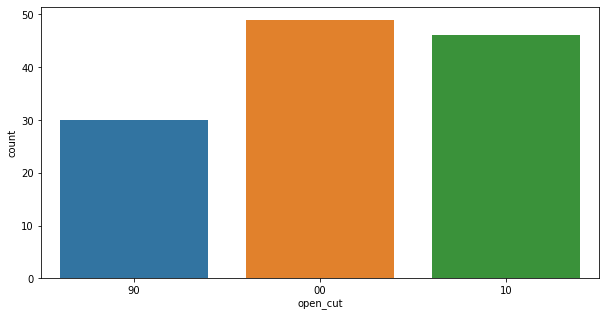

In [29]:
plt.figure(figsize=(10,5))
sns.countplot('open_cut', data = df_test)

## 회계데이터 상관성 파악하기

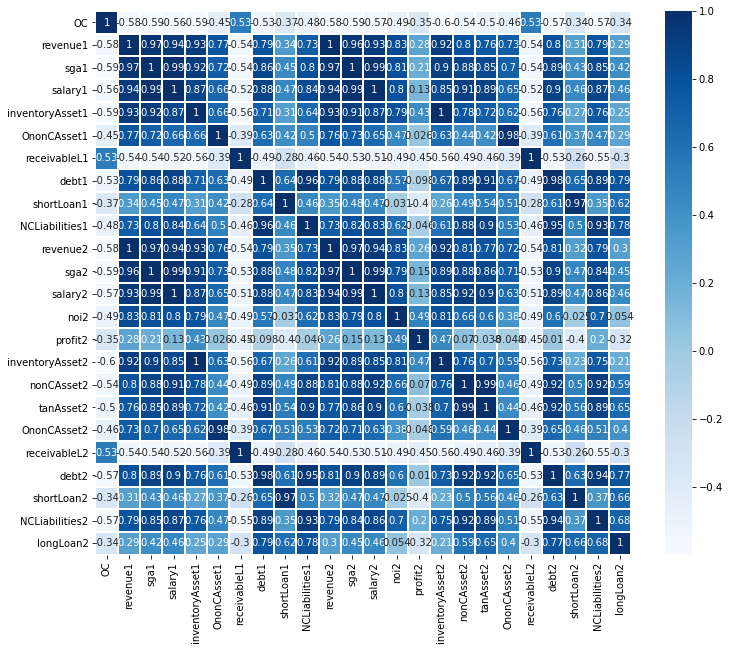

In [30]:
columns = ['OC','revenue1','salescost1', 'sga1', 'salary1', 'noi1', 'noe1', 'interest1', 'ctax1',
       'profit1', 'liquidAsset1', 'quickAsset1', 'receivableS1',
       'inventoryAsset1', 'nonCAsset1', 'tanAsset1', 'OnonCAsset1',
       'receivableL1', 'debt1', 'liquidLiabilities1', 'shortLoan1',
       'NCLiabilities1', 'longLoan1', 'netAsset1', 'surplus1', 'revenue2',
       'salescost2', 'sga2', 'salary2', 'noi2', 'noe2', 'interest2', 'ctax2',
       'profit2', 'liquidAsset2', 'quickAsset2', 'receivableS2',
       'inventoryAsset2', 'nonCAsset2', 'tanAsset2', 'OnonCAsset2',
       'receivableL2', 'debt2', 'liquidLiabilities2', 'shortLoan2',
       'NCLiabilities2', 'longLoan2', 'netAsset2', 'surplus2', 'employee1',
       'employee2']

data = df_train[columns].corr()

plt.figure(figsize = (12,10))
corr_features = data.index[abs(data["OC"])>=0.05]
sns.heatmap(data[corr_features].corr(), annot =True, cmap = 'Blues', linewidth = 1)
plt.show()

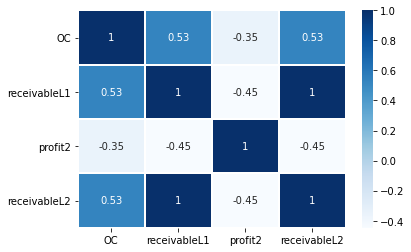

In [31]:
corr_features = data.index[abs(data["OC"])>=0.1]
sns.heatmap(data[corr_features].corr(), annot =True, cmap = 'Blues', linewidth = 1)

## Modeling
-------

In [32]:
df_train.columns

Index(['OC', 'sido', 'sgg', 'openDate', 'bedCount', 'instkind', 'revenue1',
       'salescost1', 'sga1', 'salary1', 'noi1', 'noe1', 'interest1', 'ctax1',
       'profit1', 'liquidAsset1', 'quickAsset1', 'receivableS1',
       'inventoryAsset1', 'nonCAsset1', 'tanAsset1', 'OnonCAsset1',
       'receivableL1', 'debt1', 'liquidLiabilities1', 'shortLoan1',
       'NCLiabilities1', 'longLoan1', 'netAsset1', 'surplus1', 'revenue2',
       'salescost2', 'sga2', 'salary2', 'noi2', 'noe2', 'interest2', 'ctax2',
       'profit2', 'liquidAsset2', 'quickAsset2', 'receivableS2',
       'inventoryAsset2', 'nonCAsset2', 'tanAsset2', 'OnonCAsset2',
       'receivableL2', 'debt2', 'liquidLiabilities2', 'shortLoan2',
       'NCLiabilities2', 'longLoan2', 'netAsset2', 'surplus2', 'employee1',
       'employee2', 'ownerChange', 'open_cut'],
      dtype='object')

In [33]:
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=11)
# df_test.columns.difference(['OC'])

x_train = df_train[df_train.columns.difference(['OC'])]
y_train = df_train['OC']
x_test = df_test[df_test.columns.difference(['inst_id','OC'])]
y_test = df_test['OC']
print("x_train:", x_train.shape)
print("y_train:", y_train.shape)
print("x_test:", x_test.shape)
print("y_test:", y_test.shape)

x_train: (300, 57)
y_train: (300,)
x_test: (125, 57)
y_test: (125,)


In [34]:
dt_clf = DecisionTreeClassifier(random_state=12)   #random_state 동일한 결과 반환

In [35]:
dt_clf.fit(x_train, y_train)

DecisionTreeClassifier(random_state=12)

In [36]:
dt_pred = dt_clf.predict(x_test)
dt_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [37]:
accuracy_score(dt_pred, y_test)

0.936

In [38]:
print(confusion_matrix(y_test, dt_pred))
print(classification_report(y_test, dt_pred))

[[117   8]
 [  0   0]]
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       125
           1       0.00      0.00      0.00         0

    accuracy                           0.94       125
   macro avg       0.50      0.47      0.48       125
weighted avg       1.00      0.94      0.97       125



정확도가 0.936이지만, 모두 open이라 예측하고, close라 예측한 것은 하나도 없다.
데이터 클래스의 불균형이라 모두 open이라 예측하면 정확도는 높다...!
클래스 불균형 문제점을 단적으로 보여주고 있다

### 변수 중요도

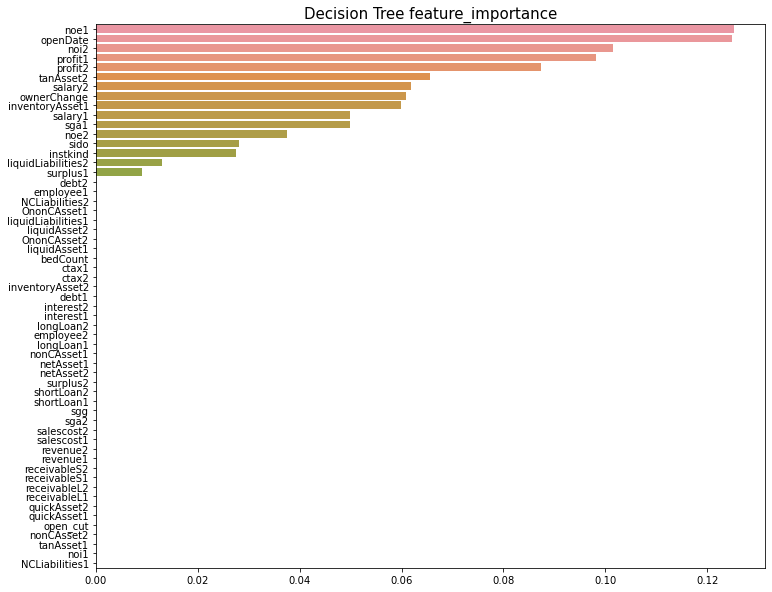

In [39]:
train_columns = df_train.columns.difference(['OC'])
importance_sr = pd.Series(dt_clf.feature_importances_, index=train_columns)
importance_sr.sort_values(ascending=False, inplace=True)

plt.figure(figsize=(12,10))
sns.barplot(x=importance_sr.values, y=importance_sr.index)
plt.title('Decision Tree feature_importance', fontsize = 15)
plt.show()

noe(영업외 비용), noi(영업외 수입), profit, salecost, receivablel(장기미수금) 순으로 변수중요도를 확인할 수 있음

In [40]:
rf_clf = RandomForestClassifier(n_estimators= 10, oob_score= True,random_state=0)

In [41]:
rf_clf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=10, oob_score=True, random_state=0)

In [42]:
rf_pred = rf_clf.predict(x_test)
accuracy_score(rf_pred, y_test)

0.992

In [43]:
print(confusion_matrix(y_test, dt_pred))
print(classification_report(y_test, dt_pred))

[[117   8]
 [  0   0]]
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       125
           1       0.00      0.00      0.00         0

    accuracy                           0.94       125
   macro avg       0.50      0.47      0.48       125
weighted avg       1.00      0.94      0.97       125



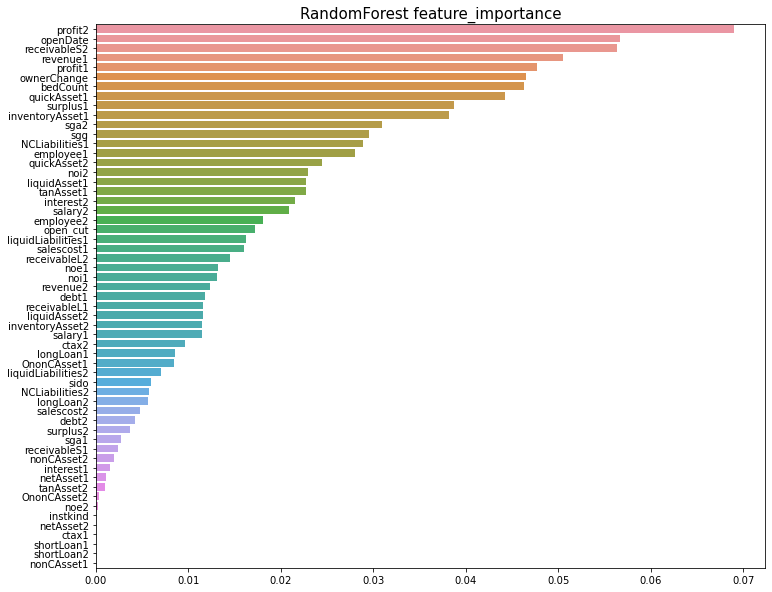

In [44]:
train_columns = df_train.columns.difference(['OC'])
importance_sr = pd.Series(rf_clf.feature_importances_, index=train_columns)
importance_sr.sort_values(ascending=False, inplace=True)

plt.figure(figsize=(12,10))
sns.barplot(x=importance_sr.values, y=importance_sr.index)
plt.title('RandomForest feature_importance', fontsize = 15)
plt.show()

### 전처리한 데이터 저장하기

In [45]:
#데이터 파일로 이동
%cd data

C:\Users\82103\Desktop\2021ML\Project1_mouda\data


In [46]:
df_train.to_csv('df_train.csv')
df_test.to_csv('df_test.csv')

In [47]:
# 저장되었는지 확인
%ls

 C 드라이브의 볼륨: Windows-SSD
 볼륨 일련 번호: 94F8-CE23

 C:\Users\82103\Desktop\2021ML\Project1_mouda\data 디렉터리

2021-05-16  오후 03:23    <DIR>          .
2021-05-16  오후 03:23    <DIR>          ..
2021-05-16  오후 06:02            73,112 df_test.csv
2021-05-16  오후 06:02           172,454 df_train.csv
2021-04-19  오후 05:45               735 submission_sample.csv
2021-05-08  오전 11:27            59,464 test.csv
2021-04-19  오후 05:45           138,646 train.csv
               5개 파일             444,411 바이트
               2개 디렉터리  136,248,614,912 바이트 남음


## 클래스 불균형에 대한 문제를 해결해야 한다!